In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 

## DATA EXPLORATION

In [2]:
conn = sqlite3.connect('../src/data/td_V1.db')
commits = pd.read_sql_query("SELECT * FROM GIT_COMMITS",conn)
commits_changes = pd.read_sql_query("SELECT * FROM GIT_COMMITS_CHANGES",conn)
faults = pd.read_sql_query("SELECT * FROM szz_fault_inducing_commits",conn)
refactoring = pd.read_sql_query("SELECT * FROM refactoring_miner",conn)

#### GIT COMMITS file

In [3]:
commits.head(3)

,projectID,commitHash,commitMessage,author,authorDate,authorTimezone,committer,committerDate,committerTimezone,branches,inMainBranch,merge,parents
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,Keith Turner,2011-10-04T00:46:07Z,0,Keith Turner,2011-10-04T00:46:07Z,0,['master'],True,False,[]
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",Billie Rinaldi,2011-10-04T16:57:13Z,0,Billie Rinaldi,2011-10-04T16:57:13Z,0,['master'],True,False,['e0880e263e4bf8662ba3848405200473a25dfc9f']
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,Keith Turner,2011-10-04T18:39:18Z,0,Keith Turner,2011-10-04T18:39:18Z,0,['master'],True,False,['e8774c5ec3a35e042f320540b5f7e66ebd2d9e87']


In [4]:
commits.shape

(140687, 13)

In [5]:
sum(commits.duplicated())

0

In [6]:
# projectIDs column
print('data type:', commits.projectID.dtype, '\n')
print('number of distinct project IDs:', len(commits.projectID.unique()),'\n')
print('number of null values in the column:', sum(commits.projectID.isnull()),'\n')
print('5 most common project IDs and % of appearance:\n', round(commits.projectID.value_counts()[:5]/len(commits),4)*100, sep = '')

data type: object 

number of distinct project IDs: 33 

number of null values in the column: 0 

5 most common project IDs and % of appearance:
ambari      17.47
beam        15.87
felix       10.97
cocoon       9.35
accumulo     7.19
Name: projectID, dtype: float64


In [7]:
# commitHash column
print('data type:', commits.commitHash.dtype, '\n')
print('number of distinct commitHashs:', len(commits.commitHash.unique()),'\n')
print('number of null values in the column:', sum(commits.commitHash.isnull()),'\n')
print('5 examples of commitHash:\n', commits.commitHash.value_counts()[:5], sep = '') # each value is unique

data type: object 

number of distinct commitHashs: 140687 

number of null values in the column: 0 

5 examples of commitHash:
6e24fe536a661c117e0c836422f0356e690e5938    1
9ed9f129bdc9858efae0cf19c2ec2911398050e8    1
ecfb55c8df612cb59b8c60e9d5ce26c48b69608e    1
ca21ff1e92ae35377aa6fee4bbeafb60fc0d6f90    1
83811612b292a6d1bb1be8cc93e521543691e87a    1
Name: commitHash, dtype: int64


In [8]:
# commitMessage column
print('data type:', commits.commitMessage.dtype, '\n')
print('number of distinct commitMessages:', len(commits.commitMessage.unique()),'\n')
print('number of null values in the column:', sum(commits.commitMessage.isnull()),'\n')
print('5 most common commitMessages and count of appearance:\n', commits.commitMessage.value_counts()[:5], sep = '')

data type: object 

number of distinct commitMessages: 135528 

number of null values in the column: 0 

5 most common commitMessages and count of appearance:
Merge branch '1.6.0-SNAPSHOT'    429
Merge branch '1.7'               256
Merge branch '1.8'               246
Merge branch '1.7' into 1.8      158
Merge branch '1.6.1-SNAPSHOT'    155
Name: commitMessage, dtype: int64


In [9]:
commits.commitMessage[13869]

"AMBARI-3933. ctrl^c during ambari-server setup 'Initializing...' leaves postgres in bad state (Dmytro Shkvyra via dlysnichenko)"

In [10]:
# author column
print('data type:', commits.author.dtype, '\n')
print('number of distinct authors:', len(commits.author.unique()),'\n')
print('number of null values in the column:', sum(commits.author.isnull()),'\n')
print('5 most common authors and count of appearance:\n', commits.author.value_counts()[:5], sep = '')

data type: object 

number of distinct authors: 1885 

number of null values in the column: 0 

5 most common authors and count of appearance:
Carsten Ziegeler     5627
Sebastian Bazley     4777
Oleg Kalnichevski    4224
Gary D. Gregory      3665
Oliver Heger         2505
Name: author, dtype: int64


In [11]:
# authorDate column
print('data type:', commits.authorDate.dtype, '\n')  # we should convert to datetime
commits.authorDate = pd.to_datetime(commits.authorDate, dayfirst=True)
print('data type:', commits.authorDate.dtype, '\n')
print('number of distinct authorDate:', len(commits.authorDate.unique()),'\n')
print('number of null values in the column:', sum(commits.authorDate.isnull()),'\n')
print('Examples:\n', commits.authorDate[:5], sep = '')

data type: object 

data type: datetime64[ns, UTC] 

number of distinct authorDate: 138720 

number of null values in the column: 0 

Examples:
0   2011-10-04 00:46:07+00:00
1   2011-10-04 16:57:13+00:00
2   2011-10-04 18:39:18+00:00
3   2011-10-04 19:31:01+00:00
4   2011-10-05 17:19:06+00:00
Name: authorDate, dtype: datetime64[ns, UTC]


In [12]:
print(commits[commits.authorTimezone != 0][['authorDate','authorTimezone']][:10])

                 authorDate authorTimezone
0 2011-10-04 00:46:07+00:00              0
1 2011-10-04 16:57:13+00:00              0
2 2011-10-04 18:39:18+00:00              0
3 2011-10-04 19:31:01+00:00              0
4 2011-10-05 17:19:06+00:00              0
5 2011-10-07 16:34:48+00:00              0
6 2011-10-07 19:13:43+00:00              0
7 2011-10-07 19:16:23+00:00              0
8 2011-10-07 19:28:04+00:00              0
9 2011-10-07 21:49:32+00:00              0


In [13]:
# authorTimezone column
print('data type:', commits.authorTimezone.dtype, '\n') 
print('number of distinct authorTimezone:', len(commits.authorTimezone.unique()),'\n')
print('number of null values in the column:', sum(commits.authorTimezone.isnull()),'\n')
print('5 most common authorTimezone and count of appearance:\n', commits.authorTimezone.value_counts()[:5], '\n', sep = '')  # units are in seconds!! 
commits.authorTimezone = commits.authorTimezone.astype(int)/3600  # convert into hours 
print('5 most common authorTimezone and count of appearance:\n', pd.DataFrame(commits.authorTimezone.value_counts()).reset_index().rename(columns = {'index':'authorTimezone','authorTimezone':'count'})[:5], sep = '')

data type: object 

number of distinct authorTimezone: 22 

number of null values in the column: 0 

5 most common authorTimezone and count of appearance:
0        77995
25200    19264
-7200     9379
28800     9224
14400     7088
Name: authorTimezone, dtype: int64

5 most common authorTimezone and count of appearance:
   authorTimezone  count
0             0.0  77995
1             7.0  19264
2            -2.0   9379
3             8.0   9224
4             4.0   7088


In [14]:
# committer column
print('data type:', commits.committer.dtype, '\n')
print('number of distinct committer:', len(commits.committer.unique()),'\n')
print('number of null values in the column:', sum(commits.committer.isnull()),'\n')
print('5 most common committer and count of appearance:\n', commits.committer.value_counts()[:5], sep = '')

data type: object 

number of distinct committer: 1017 

number of null values in the column: 0 

5 most common committer and count of appearance:
Carsten Ziegeler     5627
GitHub               5070
Sebastian Bazley     4777
Oleg Kalnichevski    4326
Gary D. Gregory      3665
Name: committer, dtype: int64


In [15]:
# committerDate column
print('data type:', commits.committerDate.dtype, '\n')  # we should convert to datetime
commits.committerDate = pd.to_datetime(commits.committerDate, dayfirst=True)
print('data type:', commits.committerDate.dtype, '\n')
print('number of distinct committerDate:', len(commits.committerDate.unique()),'\n')
print('number of null values in the column:', sum(commits.committerDate.isnull()),'\n')
print('Examples:\n', commits.committerDate[:5], sep = '')

data type: object 

data type: datetime64[ns, UTC] 

number of distinct committerDate: 133109 

number of null values in the column: 0 

Examples:
0   2011-10-04 00:46:07+00:00
1   2011-10-04 16:57:13+00:00
2   2011-10-04 18:39:18+00:00
3   2011-10-04 19:31:01+00:00
4   2011-10-05 17:19:06+00:00
Name: committerDate, dtype: datetime64[ns, UTC]


In [16]:
# committerTimezone column
print('data type:', commits.committerTimezone.dtype, '\n') 
print('number of distinct committerTimezone:', len(commits.committerTimezone.unique()),'\n')
print('number of null values in the column:', sum(commits.committerTimezone.isnull()),'\n')
print('5 most common committerTimezone and count of appearance:\n', commits.committerTimezone.value_counts()[:5], '\n', sep = '')  # units are in seconds!! 
commits.committerTimezone = commits.committerTimezone.astype(int)/3600  # convert into hours 
print('5 most common committerTimezone and count of appearance:\n', pd.DataFrame(commits.committerTimezone.value_counts()).reset_index().rename(columns = {'index':'committerTimezone','committerTimezone':'count'})[:5], sep = '')

data type: object 

number of distinct committerTimezone: 21 

number of null values in the column: 0 

5 most common committerTimezone and count of appearance:
0        78167
25200    19486
28800     9664
-7200     9433
14400     7044
Name: committerTimezone, dtype: int64

5 most common committerTimezone and count of appearance:
   committerTimezone  count
0                0.0  78167
1                7.0  19486
2                8.0   9664
3               -2.0   9433
4                4.0   7044


In [17]:
# branches column
print('data type:', commits.branches.dtype, '\n')
print('number of distinct branches:', len(commits.branches.unique()),'\n')
print('number of null values in the column:', sum(commits.branches.isnull()),'\n')
print('Count of appearance of each branch:\n', commits.branches.value_counts(), sep = '')

data type: object 

number of distinct branches: 2 

number of null values in the column: 0 

Count of appearance of each branch:
['master']    81207
['trunk']     59480
Name: branches, dtype: int64


In [18]:
# inMainBranch column
print('data type:', commits.inMainBranch.dtype, '\n')
print('number of distinct inMainBranch:', len(commits.inMainBranch.unique()),'\n')
print('number of null values in the column:', sum(commits.inMainBranch.isnull()),'\n')
print('Count of appearance of each inMainBranch:\n', commits.inMainBranch.value_counts(), sep = '')  # why is always True if there also exists Trunk branch ??? 

data type: object 

number of distinct inMainBranch: 1 

number of null values in the column: 0 

Count of appearance of each inMainBranch:
True    140687
Name: inMainBranch, dtype: int64


In [19]:
# merge column
print('data type:', commits['merge'].dtype, '\n')
print('number of distinct merge:', len(commits['merge'].unique()),'\n')
print('number of null values in the column:', sum(commits['merge'].isnull()),'\n')
print('Count of appearance of each merge:\n', commits['merge'].value_counts(), sep = '')  

data type: object 

number of distinct merge: 2 

number of null values in the column: 0 

Count of appearance of each merge:
False    129349
True      11338
Name: merge, dtype: int64


In [20]:
# parents column
print('data type:', commits['parents'].dtype, '\n')
print('number of distinct parents:', len(commits['parents'].unique()),'\n')
print('number of null values in the column:', sum(commits['parents'].isnull()),'\n')
print('Examples and count of appearance:\n', commits['parents'].value_counts()[:5], sep = '')  

data type: object 

number of distinct parents: 138151 

number of null values in the column: 0 

Examples and count of appearance:
[]                                              41
['2c8a92c8569f5b08dff03a78fdf96bf90b878b97']    15
['7f2a9efe3f2c8517a2838a29805da4c13ed5fa93']    10
['11baa1ea69d37935be147e89c8ff1b3ddac7731c']     9
['1c573ffba014f6969a689d0e6cdcace31358885d']     8
Name: parents, dtype: int64


#### REFACTORING_MINER file

In [21]:
refactoring.shape

(57530, 4)

In [22]:
refactoring.head(3)

,projectID,commitHash,refactoringType,refactoringDetail
0,accumulo,4093a3015d6b789888077e317e535df4c8102e5d,Extract Method,"Extract Method\tpublic rewriteURI(uri URI, tar..."
1,accumulo,123bd993cff822e02242197a24f47ee36bfa3744,Extract Variable,Extract Variable\tpath : String in method publ...
2,accumulo,8c04c6ae5e5ba1432e40684428338ce68431766b,Extract Variable,Extract Variable\tpath : String in method publ...


In [23]:
sum(refactoring.duplicated())

0

In [24]:
# projectID column
print('data type:', refactoring.projectID.dtype, '\n')
print('number of distinct projectID:', len(refactoring.projectID.unique()),'\n')
print('number of null values in the column:', sum(refactoring.projectID.isnull()),'\n')
print('Examples and count of projectID:\n', refactoring.projectID.value_counts()[:5], '\n', sep = '')  
print(sum(refactoring.projectID.isin(commits.projectID))/len(refactoring)*100, '% are contained in commits dataframe')

data type: object 

number of distinct projectID: 33 

number of null values in the column: 0 

Examples and count of projectID:
beam         10105
felix         6610
atlas         5029
mina-sshd     3993
cocoon        3447
Name: projectID, dtype: int64

100.0 % are contained in commits dataframe


In [25]:
# commitHash column
print('data type:', refactoring.commitHash.dtype, '\n')
print('number of distinct commitHash:', len(refactoring.commitHash.unique()),'\n')
print('number of null values in the column:', sum(refactoring.commitHash.isnull()),'\n')
print('Examples and count of commitHash:\n', refactoring.commitHash.value_counts()[:5], '\n', sep = '')  
print(sum(refactoring.commitHash.isin(commits.commitHash))/len(refactoring)*100, '% are contained in commits dataframe')  # why aren't all of them???

data type: object 

number of distinct commitHash: 11699 

number of null values in the column: 0 

Examples and count of commitHash:
b972445412d4c7c563e57a2260e99b9b5e3c7a32    800
dc86ba043d4d466fb7f39e9d1a71d9f9aca94ff4    534
0cc32f7232d1c66121554cc65e1cfa54c1549c54    502
06ddaadbcba4c66b8019815de6ca27d50a9df77d    442
d522432b79044740831a132d8b92e7dab5477444    417
Name: commitHash, dtype: int64

88.34868764123065 % are contained in commits dataframe


In [26]:
# refactoringType column
print('data type:', refactoring.refactoringType.dtype, '\n')
print('number of distinct refactoringType:', len(refactoring.refactoringType.unique()),'\n')
print('number of null values in the column:', sum(refactoring.refactoringType.isnull()),'\n')
print('Examples and count of refactoringType:\n', refactoring.refactoringType.value_counts()[:5], '\n', sep = '')  

data type: object 

number of distinct refactoringType: 30 

number of null values in the column: 0 

Examples and count of refactoringType:
Move Class        11582
Rename Method      8251
Extract Method     6712
Move Method        4772
Move Attribute     4728
Name: refactoringType, dtype: int64



In [27]:
# refactoringDetail column
print('data type:', refactoring.refactoringDetail.dtype, '\n')
print('number of distinct refactoringDetail:', len(refactoring.refactoringDetail.unique()),'\n')
print('number of null values in the column:', sum(refactoring.refactoringDetail.isnull()),'\n')
print('Examples of refactoringDetail:\n', refactoring.refactoringDetail[:5], '\n', sep = '')  

data type: object 

number of distinct refactoringDetail: 51771 

number of null values in the column: 0 

Examples of refactoringDetail:
0    Extract Method\tpublic rewriteURI(uri URI, tar...
1    Extract Variable\tpath : String in method publ...
2    Extract Variable\tpath : String in method publ...
3    Rename Variable\theader2 : Header to header : ...
4    Rename Variable\theader1 : Header to header : ...
Name: refactoringDetail, dtype: object



#### SZZ_FAULT_INDUCING_COMMITS file

In [28]:
faults.shape

(27340, 7)

In [29]:
faults.head(3)

,projectID,faultFixingCommitHash,faultFixingTimestamp,faultFixingfileChanged,faultInducingCommitHash,faultInducingTimestamp,key
0,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,49cbb142a2b5d7d89aab077dc63f7646828c9408,2003-09-04T23:28:19.000+0000,DAEMON-370
1,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,43d485a0e99c613daffba7d5b410e8e4a302e4f7,2003-09-26T09:26:04.000+0000,DAEMON-370
2,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,4f232e47002359f1a8156b5f03b227c7bae9874a,2010-03-19T00:37:22.000+0000,DAEMON-370


In [30]:
# projectID column
print('data type:', faults.projectID.dtype, '\n')
print('number of distinct projectID:', len(faults.projectID.unique()),'\n')
print('number of null values in the column:', sum(faults.projectID.isnull()),'\n')
print('Examples and count of projectID:\n', faults.projectID.value_counts()[:5], '\n', sep = '')  
print(sum(faults.projectID.isin(commits.projectID))/len(faults)*100, '% are contained in commits dataframe')

data type: object 

number of distinct projectID: 33 

number of null values in the column: 0 

Examples and count of projectID:
accumulo     9606
ambari       7110
felix        5424
mina-sshd    1588
atlas        1093
Name: projectID, dtype: int64

100.0 % are contained in commits dataframe


In [31]:
# faultFixingCommitHash column
print('data type:', faults.faultFixingCommitHash.dtype, '\n')
print('number of distinct commitHash:', len(faults.faultFixingCommitHash.unique()),'\n')
print('number of null values in the column:', sum(faults.faultFixingCommitHash.isnull()),'\n')
print('Examples and count of commitHash:\n', faults.faultFixingCommitHash.value_counts()[:5], '\n', sep = '')  
print(sum(faults.faultFixingCommitHash.isin(commits.commitHash))/len(faults)*100, '% are contained in commits dataframe')

data type: object 

number of distinct commitHash: 8538 

number of null values in the column: 0 

Examples and count of commitHash:
dd0c114d7c1d8c735b540b3e44b487a3ecb5d571    1096
c31bf3aa2092782c65bf23839aac442f44127b39     911
a271441e75a7d46cfb630a078e5b816a73addfdb     894
95f428584449f9f49726d7328679a81b603dbcc0     603
11c17d6a79f0c8f8101b0004a090378cc24316c1     585
Name: faultFixingCommitHash, dtype: int64

100.0 % are contained in commits dataframe


In [32]:
# key column
print('data type:', faults.key.dtype, '\n')
print('number of distinct projectID:', len(faults.key.unique()),'\n')
print('number of null values in the column:', sum(faults.key.isnull()),'\n')
print('Examples and count of keys:\n', faults.key.value_counts()[:5], '\n', sep = '')  

data type: object 

number of distinct projectID: 6928 

number of null values in the column: 0 

Examples and count of keys:
ACCUMULO-41      2191
ACCUMULO-1158    1096
ACCUMULO-4514     603
SSHD-553          585
ACCUMULO-3451     576
Name: key, dtype: int64



#### GIT_COMMITS_CHANGES file

In [33]:
commits_changes.head()

,projectID,commitHash,oldPath,newPath,changeType,diff,linesAdded,linesRemoved,nloc,complexity,tokenCount,methods
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,,Accumulo.README,ModificationType.ADD,"@@ -0,0 +1,196 @@\n+**************************...",196,0,145,0,1861,[]
1,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,,bin/LogForwarder.sh,ModificationType.ADD,"@@ -0,0 +1,22 @@\n+#! /usr/bin/env bash\n+#\n+...",22,0,9,0,36,[]
2,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,,bin/accumulo,ModificationType.ADD,"@@ -0,0 +1,87 @@\n+#! /usr/bin/env bash\n+\n+b...",87,0,69,1,562,['locationByProgram']
3,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,,bin/check-slaves,ModificationType.ADD,"@@ -0,0 +1,167 @@\n+#! /usr/bin/env python\n+\...",167,0,154,0,1192,[]
4,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,,bin/config.sh,ModificationType.ADD,"@@ -0,0 +1,96 @@\n+#! /usr/bin/env bash\n+#cop...",96,0,86,0,432,[]


In [34]:
commits_changes['diff'][0]

'@@ -0,0 +1,196 @@\n+******************************************************************************\n+1. Building\n+\n+In the normal tarball or RPM release of accumulo, everything is built and\n+ready to go: there is no build step.\n+\n+However, if you only have source code, or you wish to make changes, you need to\n+have maven configured to get Accumulo pre-requisites from repositories.  See\n+the pom.xml file for the necessary components.\n+\n+Run mvn assembly:assembly.\n+\n+******************************************************************************\n+2. Deployment\n+\n+Copy the accumulo tar file produced by mvn assembly:assembly from the target/\n+directory to the desired destination, then untar it (e.g. \n+tar xvzf accumulo-1.4.0-incubating-SNAPSHOT-dist.tar.gz).\n+\n+If you are using the RPM, install the RPM on every machine that will run\n+accumulo.\n+\n+******************************************************************************\n+3. Upgrading from 1.3 to 1.4\n+\n+\n+\n+***

In [35]:
commits_changes['diff'][590]

'@@ -0,0 +1,80 @@\n+package org.apache.accumulo.core.util.shell.commands;\n+\n+import java.io.IOException;\n+import java.nio.ByteBuffer;\n+\n+import org.apache.accumulo.core.client.AccumuloException;\n+import org.apache.accumulo.core.client.AccumuloSecurityException;\n+import org.apache.accumulo.core.security.thrift.AuthInfo;\n+import org.apache.accumulo.core.security.thrift.SecurityErrorCode;\n+import org.apache.accumulo.core.util.shell.Shell;\n+import org.apache.accumulo.core.util.shell.Shell.Command;\n+import org.apache.commons.cli.CommandLine;\n+import org.apache.commons.cli.Option;\n+import org.apache.commons.cli.Options;\n+\n+\n+public class PasswdCommand extends Command {\n+\tprivate Option userOpt;\n+\n+\t@Override\n+\tpublic int execute(String fullCommand, CommandLine cl, Shell shellState) throws AccumuloException, AccumuloSecurityException, IOException {\n+\t\tString currentUser = shellState.getConnector().whoami();\n+\t\tString user = cl.getOptionValue(userOpt.getOpt(), curr

In [36]:
# commitHash column
print('data type:', commits_changes.commitHash.dtype, '\n')
print('number of distinct commitHash:', len(commits_changes.commitHash.unique()),'\n')
print('number of null values in the column:', sum(commits_changes.commitHash.isnull()),'\n')
print('Examples and count of commitHash:\n', commits_changes.commitHash.value_counts()[:5], '\n', sep = '')  
print(sum(commits_changes.commitHash.isin(commits.commitHash))/len(commits_changes)*100, '% are contained in commits dataframe')  # why aren't all of them???

data type: object 

number of distinct commitHash: 128279 

number of null values in the column: 0 

Examples and count of commitHash:
a3eb94e3be8dd650cf1673298c77844ae99ca36e    6066
a0ec7eff1b9509905f1317dbaa09a688639c46ea    5800
b4950bfc80ed1352e70133fbfb03d8016339307f    4608
523ebcb257546d8d229f1baa2224e07fe54f07d1    3442
d680af8057a40ab38ab2866799eb9150283c6a4c    2676
Name: commitHash, dtype: int64

100.0 % are contained in commits dataframe


#### VISUALIZATIONS

In [37]:
# aggregate commits by project name and number of commits
commits_count = pd.DataFrame(commits[['projectID','commitHash']].groupby('projectID').count()).reset_index().sort_values('commitHash', ascending=False)

In [38]:
# aggregate commits by project name and number of commits
refactoring_count = pd.DataFrame(refactoring[['projectID','commitHash']].groupby('projectID').count()).reset_index().sort_values('commitHash', ascending=False)

In [39]:
# aggregate faults by project name and number of commits
faults_count = pd.DataFrame(faults[['projectID','faultFixingCommitHash']].groupby('projectID').count()).reset_index().sort_values('faultFixingCommitHash', ascending=False)

In [40]:
faults_count.head()

,projectID,faultFixingCommitHash
0,accumulo,9606
1,ambari,7110
27,felix,5424
30,mina-sshd,1588
2,atlas,1093


In [41]:
counts = commits_count.merge(refactoring_count, on = 'projectID', suffixes = ['_commits','_refactorings']).merge(faults_count, on = 'projectID')
counts.rename(columns = {'commitHash_commits':'commits','commitHash_refactorings':'refactorings','faultFixingCommitHash':'faults'}, inplace=True)

In [42]:
counts.head(3)

,projectID,commits,refactorings,faults
0,ambari,24578,342,7110
1,beam,22332,10105,51
2,felix,15427,6610,5424


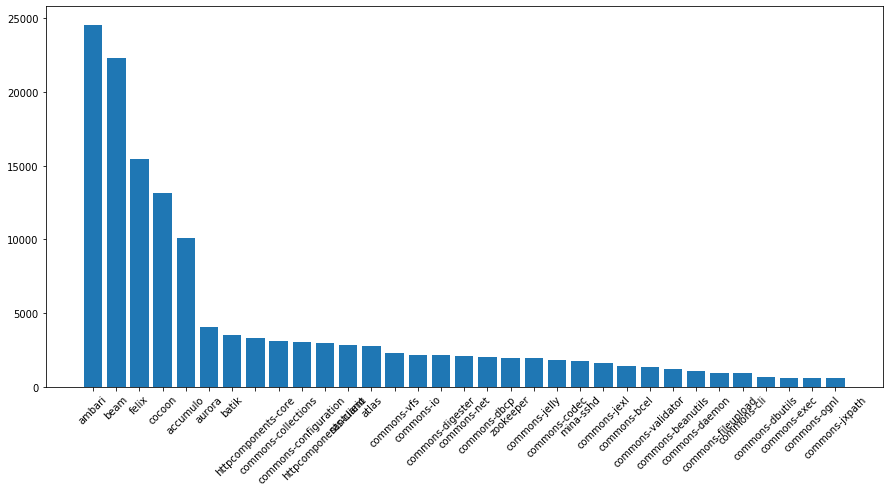

In [43]:
plt.figure(figsize=(15,7))
plt.bar(commits_count.projectID, commits_count.commitHash)
plt.xticks(rotation=45)
plt.show()

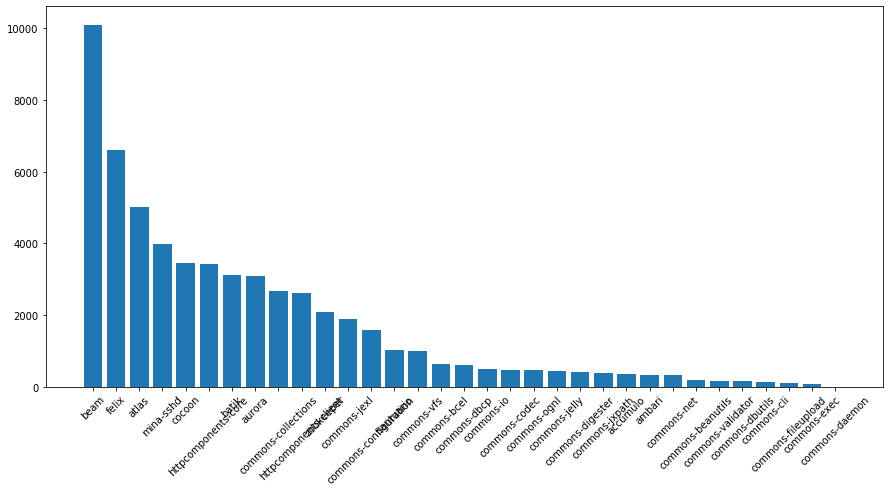

In [44]:
plt.figure(figsize=(15,7))
plt.bar(refactoring_count.projectID, refactoring_count.commitHash)
plt.xticks(rotation=45)
plt.show()

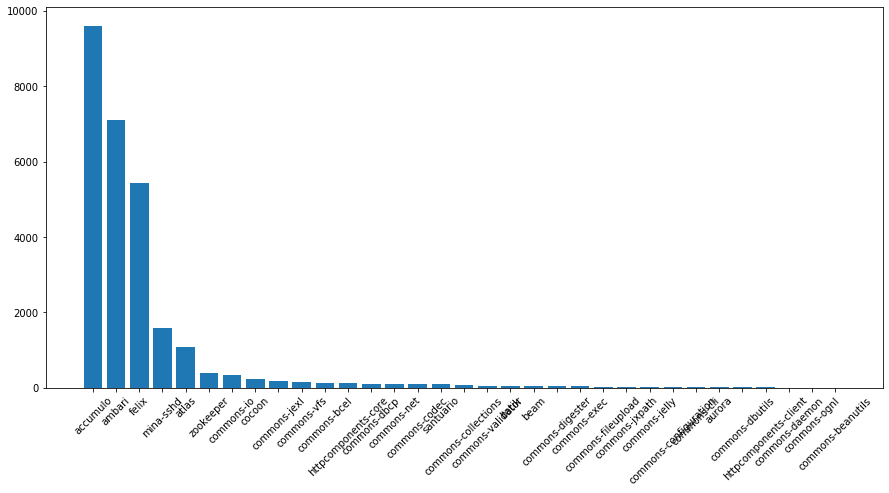

In [45]:
plt.figure(figsize=(15,7))
plt.bar(faults_count.projectID, faults_count.faultFixingCommitHash)
plt.xticks(rotation=45)
plt.show()

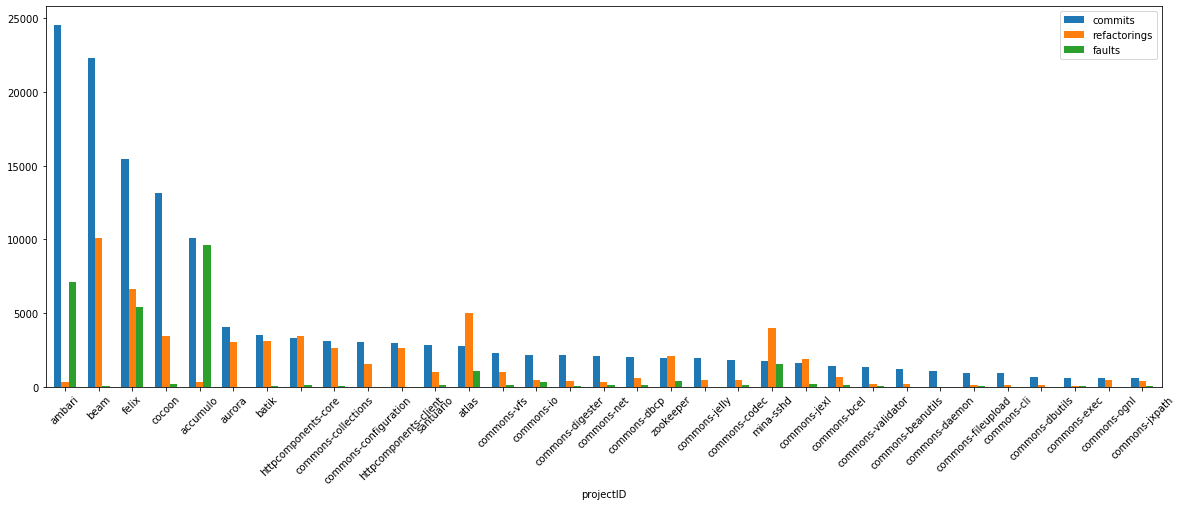

In [46]:
counts.set_index('projectID').plot(kind='bar', figsize=(20,7), rot=45, width=0.65)

In [47]:
counts.head()

,projectID,commits,refactorings,faults
0,ambari,24578,342,7110
1,beam,22332,10105,51
2,felix,15427,6610,5424
3,cocoon,13160,3447,227
4,accumulo,10122,368,9606


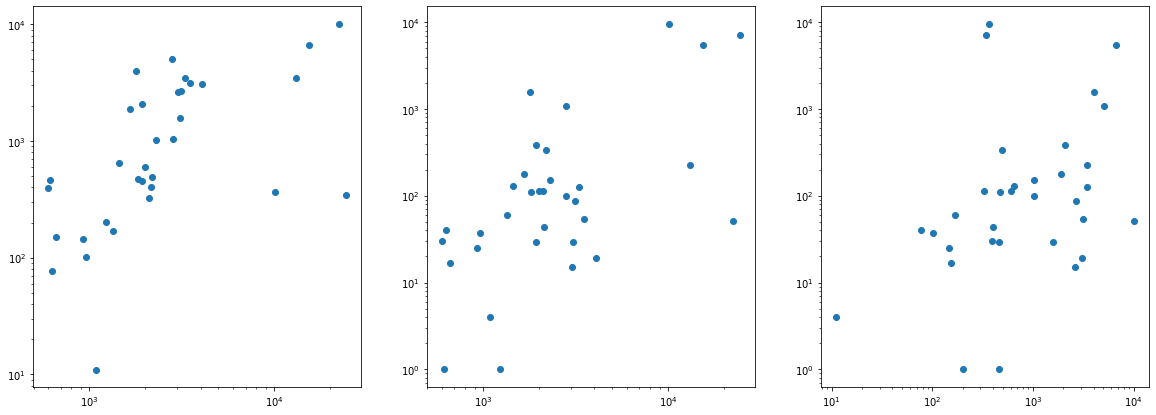

In [48]:
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.scatter(counts.commits, counts.refactorings, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.subplot(1, 3, 2)
plt.scatter(counts.commits, counts.faults, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.subplot(1, 3, 3)
plt.scatter(counts.refactorings, counts.faults, label = "label_name" )
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
# add a plot looking for the relative measures: refactorings/commits - faults

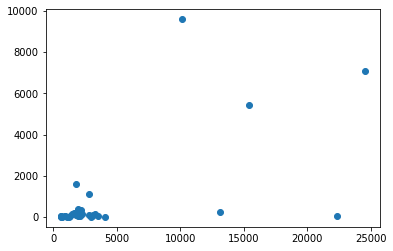

In [49]:
plt.scatter(counts.commits, counts.faults, label = "label_name" )

# Selecting the appropiate period of time

In [50]:
!find -name TAED

find: illegal option -- n
usage: find [-H | -L | -P] [-EXdsx] [-f path] path ... [expression]
       find [-H | -L | -P] [-EXdsx] -f path [path ...] [expression]


In [51]:
commits.head()

,projectID,commitHash,commitMessage,author,authorDate,authorTimezone,committer,committerDate,committerTimezone,branches,inMainBranch,merge,parents
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,Keith Turner,2011-10-04 00:46:07+00:00,0.0,Keith Turner,2011-10-04 00:46:07+00:00,0.0,['master'],True,False,[]
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",Billie Rinaldi,2011-10-04 16:57:13+00:00,0.0,Billie Rinaldi,2011-10-04 16:57:13+00:00,0.0,['master'],True,False,['e0880e263e4bf8662ba3848405200473a25dfc9f']
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,Keith Turner,2011-10-04 18:39:18+00:00,0.0,Keith Turner,2011-10-04 18:39:18+00:00,0.0,['master'],True,False,['e8774c5ec3a35e042f320540b5f7e66ebd2d9e87']
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\n\ng...,Billie Rinaldi,2011-10-04 19:31:01+00:00,0.0,Billie Rinaldi,2011-10-04 19:31:01+00:00,0.0,['master'],True,False,['2032ebbd0ed90734da39ca238bbd10dee24d0030']
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,Billie Rinaldi,2011-10-05 17:19:06+00:00,0.0,Billie Rinaldi,2011-10-05 17:19:06+00:00,0.0,['master'],True,False,['de297d4932e08625a5df146f0802041bb5aeb892']


In [52]:
import datetime

In [53]:
# Aggregate by date and visualize
# Convert to datetime date, without hour, only date  (it would also be cool to see if there are more faults in the night/ evening than during the day)
#date_count = pd.DataFrame(commits[['COMMITER_DATE']].count()).reset_index()
dates = [datetime.date.fromisoformat(commits['committerDate'][i].split("T")[0].split(" ")[0]) for i in range(len(commits['committerDate']))]
dates_df = pd.DataFrame(dates, columns =['committerDate'])

AttributeError: 'Timestamp' object has no attribute 'split'

In [ ]:
import datetime
c = commits.loc[0,'COMMITER_DATE']
c = datetime.date.fromisoformat(c.split("T")[0])
print(c)

In [ ]:
dates_df['COMMITER_DATE'].value_counts()